#Assignment 2

##Contents

<ul>
<li>Stopwords, stemming, and tokenization
<li>Tf-idf and document similarity
<li>K-means clustering
<li>Visualizing document clusters
</ul>

But first, I import everything I am going to need up front

In [ ]:
!pip install mpld3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import nltk
from bs4 import BeautifulSoup
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pathlib
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import ntpath
import scipy
from sklearn.model_selection import train_test_split
nltk.download('stopwords')
nltk.download('punkt')

     |████████████████████████████████| 890kB 11.4MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.2-cp36-none-any.whl size=200618 sha256=24c9987c751d85a39503f69741463062bbfcd4c96c8fec284ac1dec497387926
  Stored in directory: /root/.cache/pip/wheels/21/73/06/ea4b85609301850b1289a282852d92e22fcbf7a250ed5f547f
Successfully built mpld3
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#Stopwords, stemming, and tokenizing

In [ ]:
!unzip '/content/20_newsgroups.zip'

Streaming output truncated to the last 5000 lines.
  inflating: 20_newsgroups/soc.religion.christian/20362  
  inflating: 20_newsgroups/soc.religion.christian/20363  
  inflating: 20_newsgroups/soc.religion.christian/20364  
  inflating: 20_newsgroups/soc.religion.christian/20365  
  inflating: 20_newsgroups/soc.religion.christian/20487  
  inflating: 20_newsgroups/soc.religion.christian/20488  
  inflating: 20_newsgroups/soc.religion.christian/20489  
  inflating: 20_newsgroups/soc.religion.christian/20490  
  inflating: 20_newsgroups/soc.religion.christian/20491  
  inflating: 20_newsgroups/soc.religion.christian/20492  
  inflating: 20_newsgroups/soc.religion.christian/20493  
  inflating: 20_newsgroups/soc.religion.christian/20494  
  inflating: 20_newsgroups/soc.religion.christian/20495  
  inflating: 20_newsgroups/soc.religion.christian/20496  
  inflating: 20_newsgroups/soc.religion.christian/20497  
  inflating: 20_newsgroups/soc.religion.christian/20498  
  inflating: 20_newsg

In [ ]:
doc ='/content/20_newsgroups/'
List=[]
name=[]
for path in pathlib.Path(doc).iterdir():
    # print(path)
    # name.append(path)
    count =0
    for spath in pathlib.Path(path).iterdir():
      # print(path)
      if spath.is_file():
         current_file = open(spath,encoding='latin1')
         value=current_file.read()
         List.append(value)
         current_file.close()
         folder= ntpath.basename(path)
         print(folder)
         name.append(folder)

Streaming output truncated to the last 5000 lines.
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space
sci.space

Next I import the [Snowball Stemmer](http://snowball.tartarus.org/) which is actually part of NLTK. [Stemming](http://en.wikipedia.org/wiki/Stemming) is just the process of breaking a word down into its root.

In [ ]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")


Below I define two functions:

<ul>
<li> *tokenize_and_stem*: tokenizes (splits the synopsis into a list of its respective words (or tokens) and also stems each token <li> *tokenize_only*: tokenizes the synopsis only
</ul>



In [ ]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

##Tf-idf and document similarity

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    tokenizer=tokenize_and_stem,
    stop_words = 'english'
)
tfidf.fit(List)
text = tfidf.transform(List)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(100, 563)


In [ ]:
terms = tfidf_vectorizer.get_feature_names()

# **Train-Test Spilit**

In [ ]:
import scipy
root_path='/content/'
# scipy.sparse.save_npz(root_path + '/whole_tfidf.npz', text)
text = scipy.sparse.load_npz(root_path + '/whole_tfidf.npz')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(text, name, test_size=0.40, random_state=42)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X_train)

In [ ]:
tfidf_mat = X_train.toarray()

In [ ]:
print(tfidf_matrix)

In [ ]:
print(dist)

#K-means clustering

Now onto the fun part. Using the tf-idf matrix, you can run a slew of clustering algorithms to better understand the hidden structure within the synopsis. I first chose [k-means](http://en.wikipedia.org/wiki/K-means_clustering). K-means initializes with a pre-determined number of clusters (I chose 5). Each observation is assigned to a cluster (cluster assignment) so as to minimize the within cluster sum of squares. Next, the mean of the clustered observations is calculated and used as the new cluster centroid. Then, observations are reassigned to clusters and  centroids recalculated in an iterative process until the algorithm reaches convergence.

In [ ]:
number_of_clusters = 20

km = KMeans(n_clusters=number_of_clusters, 
               init='k-means++', 
               max_iter=100, # Maximum number of iterations of the k-means algorithm for a single run.
               n_init=1)  # Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

model=km.fit(X_train)

clusters = km.labels_.tolist()

In [ ]:
from sklearn.externals import joblib

joblib.dump(km,  'doc_cluster.pkl')
km = joblib.load('doc_cluster.pkl')

clusters = km.labels_.tolist()

In [ ]:
data = { 'name' : y_train, 'cluster': clusters }
frame = pd.DataFrame(data, index = [clusters] , columns = ['name', 'cluster'])

In [ ]:
frame

,name,cluster
6,rec.autos,6
13,comp.sys.ibm.pc.hardware,13
16,talk.politics.misc,16
13,talk.religion.misc,13
12,comp.windows.x,12
...,...,...
4,comp.sys.ibm.pc.hardware,4
4,comp.sys.ibm.pc.hardware,4
19,sci.crypt,19
9,sci.electronics,9


In [ ]:
frame['cluster'].value_counts()

13    3351
3     1038
9      862
8      625
5      603
6      539
7      526
10     524
0      522
18     512
12     439
2      374
16     360
15     324
17     280
4      278
1      266
19     263
11     199
14     113
Name: cluster, dtype: int64

In [ ]:
# grouped = frame['label'].groupby(frame['cluster']) #groupby cluster for aggregation purposes

# grouped.mean() #average rank (1 to 100) per cluster

##Visualizing document clusters

Train

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


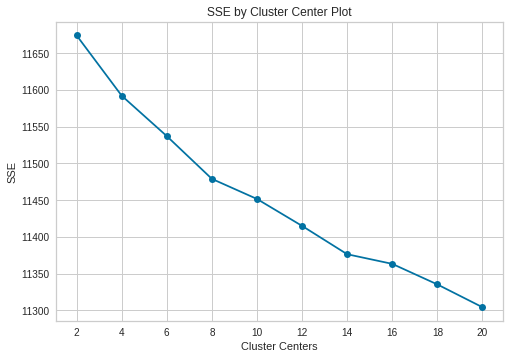

In [ ]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(X_train, 20)

In [ ]:
clusters_train =MiniBatchKMeans(n_clusters=20, init_size=1024, batch_size=2048, random_state=20).fit_predict(X_train)

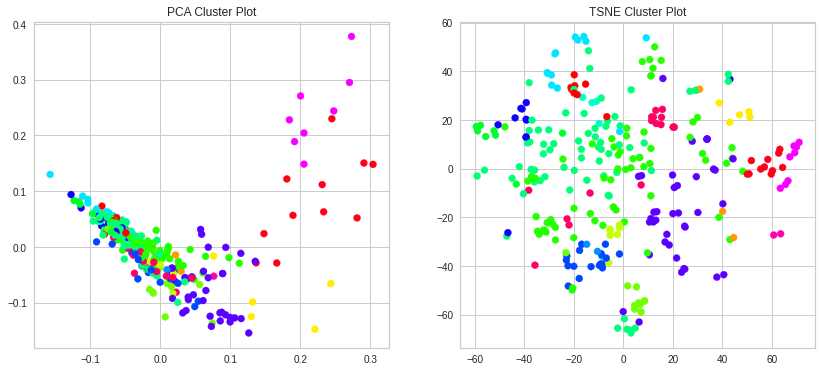

In [ ]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(X_train, clusters_train)


# **Cluster Analysis**

## **Internal Evaluation Train**

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
dists = euclidean_distances(km.cluster_centers_)
tri_dists = dists[np.triu_indices(20, 1)]
max_dist, avg_dist, min_dist = tri_dists.max(), tri_dists.mean(), tri_dists.min()

>**Single Linkage Distance:** The single linkage distance is the closest distance between two objects belonging to two different clusters defined as

>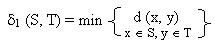




In [ ]:
min_dist

0.16478099890506645

>**Complete Linkage Distance:** The complete linkage distance is the distance between two most remote objects belonging to two different clusters defined as

>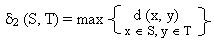

In [ ]:
max_dist

0.6313601045314233

>**Average Linkage Distance:** The average linkage distance is the average distance between all the objects belonging to two different clusters defined as

>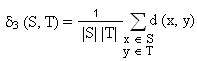

In [ ]:
avg_dist

0.35879375445789774

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f07a6f4b358>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=None, scoring='membership')

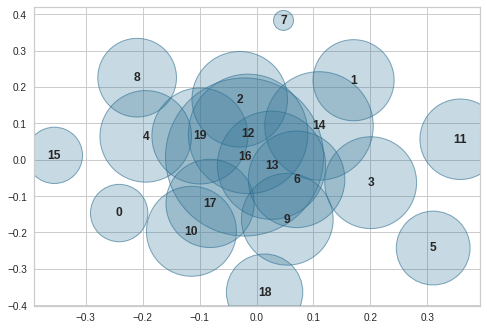

In [ ]:
from yellowbrick.cluster import InterclusterDistance
visualizer = InterclusterDistance(km)
visualizer.fit(X_train)

### Intracuster Distance:

In [ ]:
alldistances = km.fit_transform(X_train)

In [ ]:
alldistances

array([[0.9857966 , 1.00756413, 1.04567149, ..., 1.06414826, 1.05293405,
        1.02108273],
       [1.00221093, 1.00830403, 1.03821152, ..., 1.06864219, 1.05012798,
        1.02219568],
       [1.00269729, 0.96613397, 1.04958761, ..., 1.03582591, 1.03094967,
        1.02078335],
       ...,
       [0.99898614, 0.99208992, 1.04126175, ..., 1.05890592, 1.04043912,
        1.01561127],
       [0.99823218, 1.00145885, 1.03069756, ..., 1.06559634, 1.03830243,
        1.01872821],
       [1.00838499, 1.01226604, 1.05070326, ..., 1.06944922, 1.05435875,
        1.02211403]])

In [ ]:
Complete, Average = alldistances.max(), alldistances.mean()

In [ ]:
# totalDistance = np.min(alldistances, axis=1).sum
# totalDistance

>**Complete Diameter Distance:** The complete diameter distance is the distance between two most remote objects belonging to the same cluster defined as

>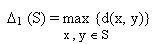

In [ ]:
Complete

1.1065663423945302

>**Average Diameter Distance:** The average diameter distance is the average distance between all the objects belonging to the same cluster defined as

>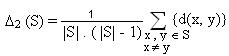

In [ ]:
Average

1.0250917868743965

# **Test**

In [ ]:
# number_of_clusters = 3

# km = KMeans(n_clusters=number_of_clusters, 
#                init='k-means++', 
#                max_iter=100, # Maximum number of iterations of the k-means algorithm for a single run.
#                n_init=1)  # Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

# model=km.fit(X_test)

# clusters = km.labels_.tolist()
clusters=km.predict(X_test)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


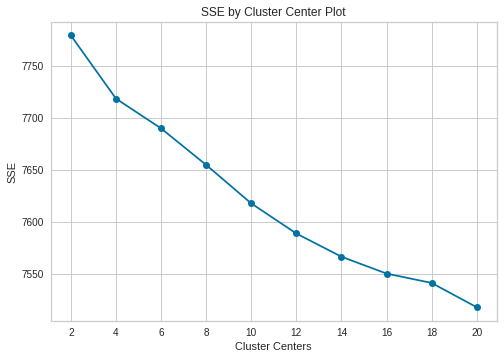

In [ ]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(X_test, 20)

In [ ]:
clusters_test =MiniBatchKMeans(n_clusters=12, init_size=1024, batch_size=2048, random_state=20).fit_predict(X_test)

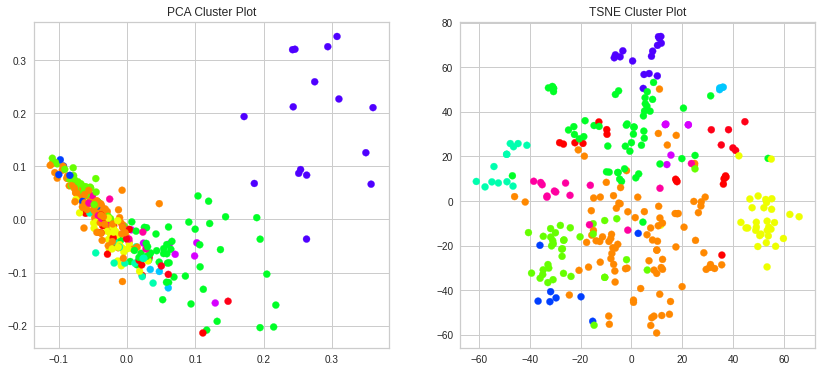

In [ ]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(X_test, clusters_test)


## **Internal Evaluation Test**

In [ ]:
number_of_clusters = 12

km = KMeans(n_clusters=number_of_clusters, 
               init='k-means++', 
               max_iter=100, # Maximum number of iterations of the k-means algorithm for a single run.
               n_init=1)  # Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

model=km.fit(X_test)

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
dists = euclidean_distances(km.cluster_centers_)
tri_dists = dists[np.triu_indices(12, 1)]
max_dist, avg_dist, min_dist = tri_dists.max(), tri_dists.mean(), tri_dists.min()

>**Single Linkage Distance:** The single linkage distance is the closest distance between two objects belonging to two different clusters defined as

>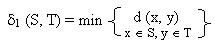




In [ ]:
min_dist

0.14946430904894406

>**Complete Linkage Distance:** The complete linkage distance is the distance between two most remote objects belonging to two different clusters defined as

>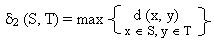

In [ ]:
max_dist

0.4685630453313859

>**Average Linkage Distance:** The average linkage distance is the average distance between all the objects belonging to two different clusters defined as

>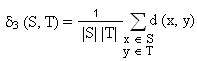

In [ ]:
avg_dist

0.3047352663337115

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f07a6d4f4e0>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=None, scoring='membership')

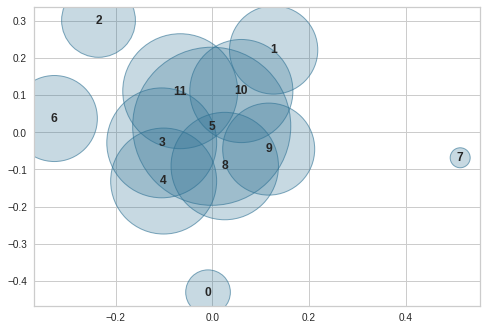

In [ ]:
from yellowbrick.cluster import InterclusterDistance
visualizer = InterclusterDistance(km)
visualizer.fit(X_test)

### Intracuster Distance:

In [ ]:
alldistances = km.fit_transform(X_test)

In [ ]:
alldistances

array([[1.02504528, 1.02077875, 1.04203053, ..., 0.98382714, 1.00794453,
        0.99873099],
       [1.02539154, 1.03121882, 1.03284414, ..., 0.99145296, 1.01413249,
        0.99379934],
       [1.01716377, 1.01810432, 1.0485483 , ..., 0.97605279, 0.98706479,
        0.99836328],
       ...,
       [1.02877504, 1.03674612, 1.03878827, ..., 0.98861148, 1.01401765,
        1.00486766],
       [1.01305285, 1.02488045, 1.02705916, ..., 0.98639257, 1.0057554 ,
        0.97348989],
       [1.02354355, 1.01703072, 1.05513559, ..., 0.98244405, 1.00645798,
        1.00454692]])

In [ ]:
Complete, Average = alldistances.max(), alldistances.mean()

In [ ]:
# totalDistance = np.min(alldistances, axis=1).sum
# totalDistance

>**Complete Diameter Distance:** The complete diameter distance is the distance between two most remote objects belonging to the same cluster defined as

>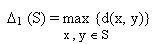

In [ ]:
Complete

1.0983462246386984

>**Average Diameter Distance:** The average diameter distance is the average distance between all the objects belonging to the same cluster defined as

>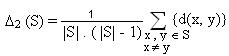

In [ ]:
Average

1.0157709687324743

# **External Evaluation**

### Purity

The ratio between the dominant class in a cluster and the size of cluster.

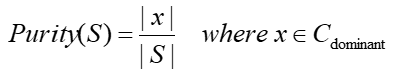

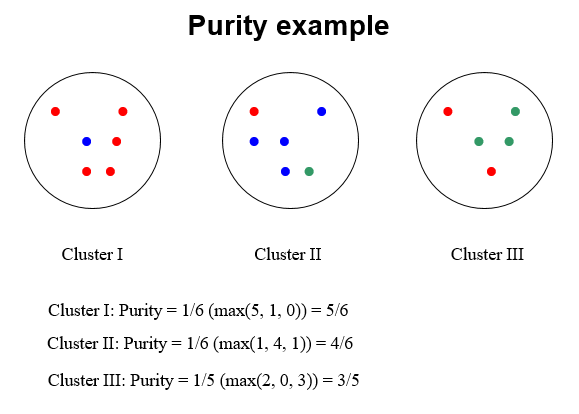

In [ ]:
classes = { 0:['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','comp.windows.x'],
            1:['rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey'],
            2:['sci.crypt','sci.electronics','sci.med','sci.space'],
            3:['misc.forsale'],
            4:['talk.politics.misc','talk.politics.guns','talk.politics.mideast'],
            5:['talk.religion.misc','alt.atheism','soc.religion.christian']
        }

In [ ]:
def purity(clust):
  cluster_length = frame[frame['cluster']==clust]["name"].count()
  cluster_mt = list(frame[frame['cluster']==clust]["name"])

  class_lengths = list()
  for k, titles in classes.items():
      count = 0
      for t in cluster_mt:
          if t in titles:
              count+=1
      class_lengths.append(count)

  max_class_length = np.max(np.array(class_lengths))
  purity = max_class_length / cluster_length
  return purity

In [ ]:
for x in range(0,6):
  print("purity of Cluster ",x ,':', purity(x))

purity of Cluster  0 : 0.6476906552094522
purity of Cluster  1 : 0.9978947368421053
purity of Cluster  2 : 0.5544973544973545
purity of Cluster  3 : 0.938239159001314
purity of Cluster  4 : 0.6038077969174978
purity of Cluster  5 : 0.4727016555125044
